###### Loading and Imports

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# Load dataframes

# platform_info
platform_info = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\final_df.csv")

# imdb_top
imdb_top = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\imdb_top.csv")

# imdb_bottom
imdb_bottom = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\imdb_bottom.csv")

# cancellation_rates
cancellation_rates = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\cancellation_rates.csv")

# streaming_costs
streaming_costs = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\streaming_costs.csv")


Check Dataframes for successful import

In [31]:
platform_info.head()


,imdbId,title,type,releaseYear,rating,numVotes,Amazon,Hulu,Netflix,HBO,...,Reality-TV,Romance,Science Fiction,Short,Sport,TV Movie,Talk-Show,Thriller,War,Western
0,tt0000417,A Trip to the Moon,movie,1902,8.1,57365,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0000499,An Impossible Voyage,movie,1904,7.5,4153,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,tt0004873,Alice in Wonderland,movie,1915,6.1,804,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0005078,The Cheat,movie,1915,6.5,2893,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,tt0005302,"Fanchon, the Cricket",movie,1915,6.4,366,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
platform_info.describe().T


,count,mean,std,min,25%,50%,75%,max
releaseYear,43280.0,2008.621095,18.706955,1898.0,2005.0,2016.0,2020.0,2024.0
rating,43280.0,6.136033,1.309772,1.1,5.3,6.3,7.1,9.9
numVotes,43280.0,15694.318877,76668.649997,5.0,179.0,802.0,4252.5,2951494.0
Amazon,43280.0,0.521465,0.499545,0.0,0.0,1.0,1.0,1.0
Hulu,43280.0,0.062015,0.241185,0.0,0.0,0.0,0.0,1.0
Netflix,43280.0,0.158133,0.364870,0.0,0.0,0.0,0.0,1.0
HBO,43280.0,0.059196,0.235994,0.0,0.0,0.0,0.0,1.0
Apple,43280.0,0.249931,0.432978,0.0,0.0,0.0,0.0,1.0
Action,43280.0,0.154251,0.361194,0.0,0.0,0.0,0.0,1.0
Adventure,43280.0,0.095749,0.294250,0.0,0.0,0.0,0.0,1.0


In [33]:
cancellation_rates.head()


,Platform,Cancellation_Rate_Percentage,Interpretation
0,Max,26.9,High-profile cancellations (Westworld). Cost-c...
1,Hulu,15.2,"Mid-tier rate, maintaining some consistency."
2,Netflix,10.2,Balances hit-making with cancellations of unde...
3,Prime Video,9.0,Selective greenlighting reduces cancellations.
4,Apple TV,4.9,"Prestige-focused, curated content. Lowest canc..."


In [34]:
streaming_costs.head(10)


,Platform,Price_Per_Month
0,Netflix,15.49
1,Hulu,17.99
2,Amazon Prime,14.97
3,Apple TV,9.99
4,Max,16.99


Make seperate df for each platform

In [35]:
# Create a copy of the platform_info DataFrame to avoid modifying the original DataFrame directly
platform_info = platform_info.copy()

# Add the 'exclusivity' column by summing the platform availability columns
platform_info['exclusivity'] = platform_info[['Amazon', 'Hulu', 'Netflix', 'Apple', 'HBO']].sum(axis=1)

# Check the first few rows to ensure 'exclusivity' column is added correctly
print(platform_info[['imdbId', 'title', 'exclusivity', 'Amazon', 'Hulu', 'Netflix', 'Apple', 'HBO']].head())


# Now filter the rows for each platform where the platform column is 1
amazon_df = platform_info[platform_info['Amazon'] == 1].copy()
hulu_df = platform_info[platform_info['Hulu'] == 1].copy()
netflix_df = platform_info[platform_info['Netflix'] == 1].copy()
apple_df = platform_info[platform_info['Apple'] == 1].copy()
hbo_df = platform_info[platform_info['HBO'] == 1].copy()


# Define platform names and their corresponding data
platforms = {
    'Amazon': amazon_df,
    'Apple': apple_df,
    'HBO': hbo_df,
    'Hulu': hulu_df,
    'Netflix': netflix_df
}


      imdbId                 title  exclusivity  Amazon  Hulu  Netflix  Apple  \
0  tt0000417    A Trip to the Moon            1       0     0        0      0   
1  tt0000499  An Impossible Voyage            1       0     0        0      0   
2  tt0004873   Alice in Wonderland            1       1     0        0      0   
3  tt0005078             The Cheat            1       1     0        0      0   
4  tt0005302  Fanchon, the Cricket            1       1     0        0      0   

   HBO  
0    1  
1    1  
2    0  
3    0  
4    0  


In [36]:
netflix_df.head()


,imdbId,title,type,releaseYear,rating,numVotes,Amazon,Hulu,Netflix,HBO,...,Romance,Science Fiction,Short,Sport,TV Movie,Talk-Show,Thriller,War,Western,exclusivity
1625,tt0054215,Psycho,movie,1960,8.5,738000,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1741,tt0056379,Professor,movie,1962,6.8,361,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1769,tt0056869,The Birds,movie,1963,7.6,209948,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1851,tt0058329,Marnie,movie,1964,7.1,55199,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1949,tt0060104,Amrapali,movie,1966,6.6,290,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


***

# **High-Rated Content (%)**
*Percentage of platform library titles with IMDb ≥ 7.5 for each platform.*

| Platform | High-Rated Content (%) |
|----------|-------------------------|
| HBO      | 32.16                  |
| Hulu     | 26.56                  |
| Netflix  | 19.61                  |
| Apple    | 16.92                  |
| Amazon   | 11.24                  |

**There is a clear positive correlation between the percentage of high-rated content and platform value**

* **HBO** offers the most high-rated content, which is likely to be seen as the most valuable for consumers who prioritize quality.
* **Hulu**, with a slightly lower percentage but still significant, follows closely behind.
* **Netflix** offers a decent amount of high-rated content, but it still trails behind in terms of percentage.
* **Apple** and **Amazon** have the least high-rated content, making them potentially less attractive for consumers who prioritize quality content over quantity.


### **Analysis**

In [37]:
# Function to calculate count and percentage of high-rated content
def calculate_high_rated_content(df):
    """
    Calculate the count and percentage of high-rated content (rating >= 7.5) in a DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame containing the content data.
    
    Returns:
    tuple: A tuple containing the count and percentage of high-rated content.
    """
    high_rated = df[df['rating'] >= 7.5]
    count = len(high_rated)
    percentage = (count / len(df)) * 100 if len(df) > 0 else 0
    return count, percentage

# Calculate high-rated content count and percentage for each platform
high_rated_stats = {
    platform: calculate_high_rated_content(df) for platform, df in platforms.items()
}

# Extract the high-rated content count and percentage into separate variables
high_rated_counts = {platform: stats[0] for platform, stats in high_rated_stats.items()}
high_rated_percentages = {platform: round(stats[1], 2) for platform, stats in high_rated_stats.items()}

# Convert high_rated_stats into a DataFrame
high_rated_df = pd.DataFrame.from_dict(high_rated_stats, orient='index', columns=['High-Rated Content Count', 'High-Rated Content (%)'])

# Round the percentage to 2 decimal places
high_rated_df['High-Rated Content (%)'] = high_rated_df['High-Rated Content (%)'].round(2)

# Display the DataFrame
high_rated_df


,High-Rated Content Count,High-Rated Content (%)
Amazon,2536,11.24
Apple,1830,16.92
HBO,824,32.16
Hulu,713,26.56
Netflix,1342,19.61


***


# **Exclusivity (%)**:

| Platform | Exclusive Titles Count | Average Rating | Exclusivity (%) |
|----------|-------------------------|----------------|-----------------|
| Amazon   | 21,055                 | 5.79           | 93.29           |
| Hulu     | 2,058                  | 6.59           | 76.68           |
| Netflix  | 6,444                  | 6.47           | 94.16           |
| Apple    | 9,255                  | 6.31           | 85.56           |
| HBO      | 2,368                  | 6.92           | 92.43           |


**Exclusivity Percentage:**

* **Netflix** (94.16%) and **Amazon** (93.29%) lead in exclusivity, offering unique libraries.
* **Apple** (85.56%) has a substantial exclusivity percentage, while **Hulu** (76.68%) has the lowest among the platforms analyzed.


**Average Ratings:**

* **HBO** (6.92) dominates in average ratings for exclusive content, with **Hulu** (6.59) closely following.
* **Amazon** (5.79) has the lowest average rating for exclusives.


**Exclusive Title Counts:**

* **Amazon** has the highest number of exclusive titles (21,055), suggesting a focus on breadth rather than high ratings.
* **Hulu** and **HBO** have fewer exclusive titles but higher average ratings, signaling a focus on quality over quantity.

### Analysis

In [38]:
# Define a function to calculate exclusivity metrics for a given platform
def exclusivity_analysis(platform_df, platform_name):
    """
    Analyzes exclusivity for a specific platform.
    
    Parameters:
    platform_df (DataFrame): Data for the platform
    platform_name (str): Name of the platform
    
    Returns:
    dict: Metrics including platform name, exclusive titles count, average rating, and exclusivity percentage
    """
    # Filter exclusive titles (exclusivity == 1)
    exclusive_titles = platform_df[platform_df['exclusivity'] == 1]
    
    # Calculate metrics
    exclusive_count = len(exclusive_titles)
    avg_rating = exclusive_titles['rating'].mean() if not exclusive_titles.empty else 0
    exclusivity_percentage = (exclusive_count / len(platform_df) * 100) if len(platform_df) > 0 else 0
    
    # Return metrics
    return {
        'Platform': platform_name,
        'Exclusive Titles Count': exclusive_count,
        'Exclusivity (%)': exclusivity_percentage,
        'Average Rating (Exclusive Titles)': avg_rating
    }


In [39]:

# Apply exclusivity analysis to each platform dataset
amazon_exclusivity = exclusivity_analysis(amazon_df, 'Amazon')
hulu_exclusivity = exclusivity_analysis(hulu_df, 'Hulu')
netflix_exclusivity = exclusivity_analysis(netflix_df, 'Netflix')
apple_exclusivity = exclusivity_analysis(apple_df, 'Apple')
hbo_exclusivity = exclusivity_analysis(hbo_df, 'HBO')

# Combine the results into a single DataFrame
exclusivity_data = pd.DataFrame([
    amazon_exclusivity,
    hulu_exclusivity,
    netflix_exclusivity,
    apple_exclusivity,
    hbo_exclusivity
])


In [40]:
# Format the columns to two decimal places
exclusivity_data['Exclusivity (%)'] = exclusivity_data['Exclusivity (%)'].round(2)
exclusivity_data['Average Rating (Exclusive Titles)'] = exclusivity_data['Average Rating (Exclusive Titles)'].round(2)

# Convert the series to lists
exclusivity_percentage = exclusivity_data['Exclusivity (%)'].tolist()
average_rating = exclusivity_data['Average Rating (Exclusive Titles)'].tolist()

# Display the updated DataFrame and lists
print(exclusivity_data)
print("Exclusivity Percentage List:", exclusivity_percentage)
print("Average Rating List:", average_rating)


  Platform  Exclusive Titles Count  Exclusivity (%)  \
0   Amazon                   21055            93.29   
1     Hulu                    2058            76.68   
2  Netflix                    6444            94.16   
3    Apple                    9255            85.56   
4      HBO                    2368            92.43   

   Average Rating (Exclusive Titles)  
0                               5.79  
1                               6.59  
2                               6.47  
3                               6.31  
4                               6.92  
Exclusivity Percentage List: [93.29, 76.68, 94.16, 85.56, 92.43]
Average Rating List: [5.79, 6.59, 6.47, 6.31, 6.92]


***

# **Cost-Effectiveness (per Title)**:
*The cost-per-high-rated-title metric evaluates how much consumers effectively pay for access to high-quality content (titles with IMDb ≥ 7.5). A lower cost indicates better value for price-conscious users.*


| Platform | Cost per High-Rated Title |
|----------|---------------------------|
| Amazon   | 0.0059                    |
| Apple    | 0.0055                    |
| HBO      | 0.0218                    |
| Hulu     | 0.0238                    |
| Netflix  | 0.0115                    |


* **Amazon** and **Apple** provide the *lowest cost per high-rated title*, making them attractive to price-sensitive consumers, despite potentially lacking variety or exclusivity.

* **Netflix** balances *cost-effective*ness with a diverse and extensive library, offering competitive value without being the cheapest.

* **HBO** and **Hulu** have the *highest costs per high-rated title*, appealing to consumers who prioritize premium, high-quality content over cost-effectiveness.

## Analysis

In [41]:
# Function to calculate cost-per-high-rated-title
def calculate_cost_per_high_rated_title(subscription_price, high_rated_count):
    """
    Calculate the cost per high-rated title for a given subscription price and high-rated count.
    
    Parameters:
    subscription_price (float): The monthly subscription price of the platform.
    high_rated_count (int): The number of high-rated titles (rating >= 7.5) on the platform.
    
    Returns:
    float: The cost per high-rated title. Returns infinity if there are no high-rated titles.
    """
    if high_rated_count > 0:
        return subscription_price / high_rated_count
    else:
        return float('inf')  # In case there are no high-rated titles

# Subscription Prices for each platform
subscription_price = {
    'Amazon': 14.97,
    'Apple': 9.99,
    'HBO': 17.99,
    'Hulu': 16.99,
    'Netflix': 15.49
}

# High Rated Count for each platform
high_rated_counts = {
    'Amazon': 2536,
    'Apple': 1830,
    'HBO': 824,
    'Hulu': 713,
    'Netflix': 1342
}

# Calculate cost-per-high-rated-title for each platform
cost_per_high_rated = {
    platform: calculate_cost_per_high_rated_title(subscription_price[platform], high_rated_counts[platform])
    for platform in subscription_price.keys()
}

# Display the cost-per-high-rated-title for each platform
cost_per_high_rated


{'Amazon': 0.005902996845425868,
 'Apple': 0.005459016393442623,
 'HBO': 0.021832524271844657,
 'Hulu': 0.023828892005610097,
 'Netflix': 0.0115424739195231}

---

# **Cancellation Rate (%)**:
*Rates for cancellation of exclusive titles for each platform from 2020 - 2023*


| Platform | Cancellation Rate (%) |
|----------|-----------------------|
| HBO      | 26.9                  |
| Hulu     | 15.2                  |
| Netflix  | 10.2                  |
| Amazon   | 9.0                   |
| Apple    | 4.9                   |


## Analysis

In [42]:
# Define cancellation rates for each platform from 2020 to 2023
cancellation_rates = {
    'Amazon': 9.00,
    'Apple': 4.90,
    'HBO': 26.90,
    'Hulu': 15.20,
    'Netflix': 10.20
}

# Display the cancellation rates
cancellation_rates


{'Amazon': 9.0, 'Apple': 4.9, 'HBO': 26.9, 'Hulu': 15.2, 'Netflix': 10.2}

***

# **Overlap**:

<div style="display: flex; gap: 20px;">

<div style="flex: 1;">
<strong>Overall Metrics</strong>
<table>
<tr><td>Total Unique Titles</td><td>43,280</td></tr>
<tr><td>Overlap Titles Count</td><td>2,100</td></tr>
<tr><td>Overall Overlap (%)</td><td>4.85%</td></tr>
</table>
</div>

<div style="flex: 1;">
<strong>Platform Overlap</strong>
<table>
<tr><td>Platform</td><td>Overlap (%)</td></tr>
<tr><td>Amazon</td><td>1.32</td></tr>
<tr><td>Apple</td><td>1.79</td></tr>
<tr><td>HBO</td><td>0.51</td></tr>
<tr><td>Hulu</td><td>1.35</td></tr>
<tr><td>Netflix</td><td>0.69</td></tr>
</table>
</div>

</div>



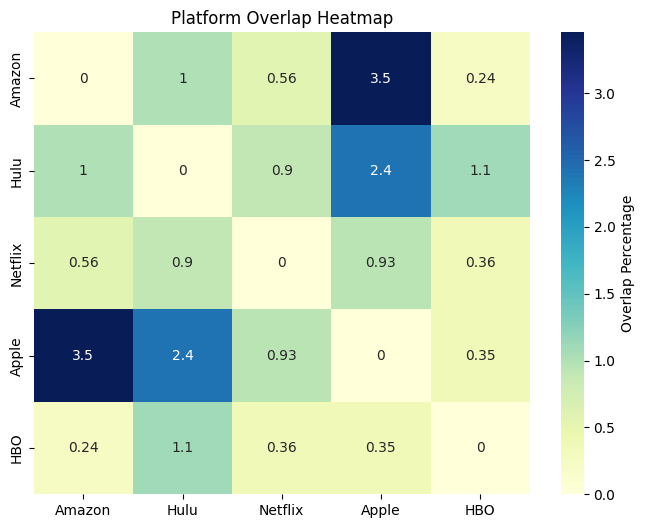



* **HBO** leads in exclusivity, with minimal overlap, reinforcing its reputation as a provider of unique content.
* **Netflix** follows with relatively low overlap, further emphasizing its commitment to exclusive titles.
* Platforms with higher overlap (**Apple**, **Amazon**, and **Hulu**) may focus more on shared or less distinctive content, reducing their perceived exclusivity.


## Analysis

In [43]:
# Combine all platform data into one DataFrame (considering unique imdbId and title)
all_platforms_df = pd.concat([amazon_df[['imdbId', 'title']], hulu_df[['imdbId', 'title']], 
                              netflix_df[['imdbId', 'title']], apple_df[['imdbId', 'title']], 
                              hbo_df[['imdbId', 'title']]])

# Remove duplicate titles and keep unique titles
unique_titles_df = all_platforms_df.drop_duplicates(subset=['imdbId'])

# Count how many times each title appears across platforms (i.e., check overlap)
title_counts = all_platforms_df['imdbId'].value_counts()

# Identify titles that appear on more than one platform (overlap)
overlap_titles = title_counts[title_counts > 1]

# Calculate the overall overlap percentage
total_unique_titles = len(unique_titles_df)
overlap_percentage = (len(overlap_titles) / total_unique_titles) * 100

# Display the results
print(f'Total Unique Titles: {total_unique_titles}')
print(f'Overlap Titles Count: {len(overlap_titles)}')
print(f'Overall Overlap Percentage: {overlap_percentage:.2f}%')


Total Unique Titles: 43280
Overlap Titles Count: 2100
Overall Overlap Percentage: 4.85%


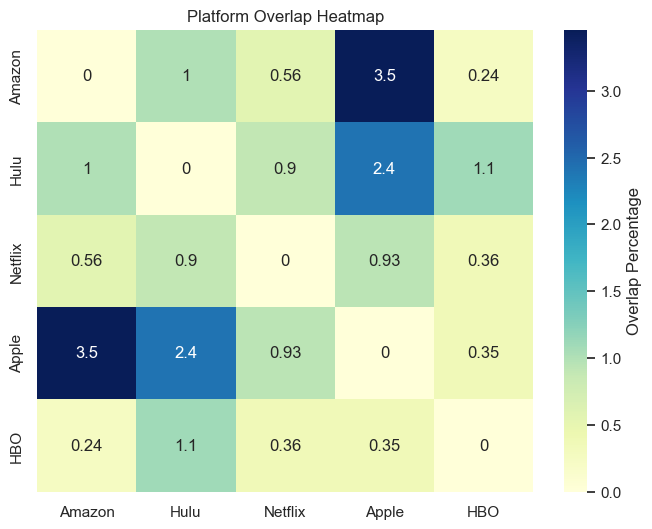

In [44]:
# Create a binary matrix indicating availability of titles on each platform
platform_columns = ['Amazon', 'Hulu', 'Netflix', 'Apple', 'HBO']
binary_overlap_matrix = pd.DataFrame(0.0, index=platform_columns, columns=platform_columns)  # Ensure it's a float matrix

# Calculate overlap percentages and ensure symmetry
for platform_1 in platform_columns:
    for platform_2 in platform_columns:
        if platform_1 != platform_2:
            # Get the sets of titles for each platform
            set_1 = set(eval(f'{platform_1.lower()}_df["imdbId"]'))
            set_2 = set(eval(f'{platform_2.lower()}_df["imdbId"]'))
            
            # Calculate the overlap: number of common titles
            common_titles = set_1.intersection(set_2)
            total_titles = set_1.union(set_2)
            
            # Calculate the overlap percentage
            overlap_percentage = len(common_titles) / len(total_titles) * 100
            
            # Set overlap for both directions (symmetry)
            binary_overlap_matrix.loc[platform_1, platform_2] = float(overlap_percentage)  # Cast to float
            binary_overlap_matrix.loc[platform_2, platform_1] = float(overlap_percentage)  # Ensure symmetry

# Plot the heatmap of platform overlap
plt.figure(figsize=(8, 6))
sns.heatmap(binary_overlap_matrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Overlap Percentage'})
plt.title("Platform Overlap Heatmap")
plt.savefig(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\platform_overlap.png')

# Display the heatmap
plt.show()


In [45]:
# Stack the binary overlap matrix to create a Series with multi-index (platform pairs)
overlap_percentages = binary_overlap_matrix.stack()

# Sort the overlap percentages in descending order
overlap_percentages_sorted = overlap_percentages.sort_values(ascending=False)

# Print the sorted overlap percentages
print("Platform Pairwise Overlap (sorted):")
print(overlap_percentages_sorted)


Platform Pairwise Overlap (sorted):
Amazon   Apple      3.455114
Apple    Amazon     3.455114
Hulu     Apple      2.412198
Apple    Hulu       2.412198
Hulu     HBO        1.098478
HBO      Hulu       1.098478
Hulu     Amazon     1.003920
Amazon   Hulu       1.003920
Apple    Netflix    0.931535
Netflix  Apple      0.931535
Hulu     Netflix    0.900138
Netflix  Hulu       0.900138
Amazon   Netflix    0.564141
Netflix  Amazon     0.564141
HBO      Netflix    0.362783
Netflix  HBO        0.362783
HBO      Apple      0.352535
Apple    HBO        0.352535
HBO      Amazon     0.243319
Amazon   HBO        0.243319
         Amazon     0.000000
Hulu     Hulu       0.000000
Netflix  Netflix    0.000000
Apple    Apple      0.000000
HBO      HBO        0.000000
dtype: float64


In [46]:
# Assuming binary_overlap_matrix is already defined, which is a matrix of platform overlap

# Convert the pairwise overlap series into a DataFrame
overlap_df = overlap_percentages.reset_index()
overlap_df.columns = ['Platform1', 'Platform2', 'Overlap']

# Filter out self-overlaps (diagonal values)
overlap_df = overlap_df[overlap_df['Platform1'] != overlap_df['Platform2']]

# Calculate the average overlap for each platform
average_overlap = overlap_df.groupby('Platform1')['Overlap'].mean()

# Convert to a dictionary for easy lookup
overlap_dict = average_overlap.to_dict()

# Display the overlap dictionary
overlap_dict



{'Amazon': 1.3166235077463,
 'Apple': 1.787845578076157,
 'HBO': 0.5142785667384007,
 'Hulu': 1.3536831075794797,
 'Netflix': 0.6896491489234081}

***

# **Genre-Specific Analysis** 

| Genre             | Amazon (%) | Apple (%) | HBO (%)  | Hulu (%) | Netflix (%) |
|-------------------|------------|-----------|----------|----------|-------------|
| Action            | 5.62       | 11.16     | 28.76    | 28.35    | 19.23       |
| Comedy            | 9.06       | 12.51     | 28.90    | 26.67    | 16.98       |
| Documentary       | 35.97      | 45.27     | 34.39    | 35.02    | 28.21       |
| Drama             | 9.46       | 15.68     | 39.48    | 29.53    | 21.87       |
| Science Fiction   | 3.18       | 11.35     | 21.95    | 13.83    | 8.33        |

**Action:**
* *Hulu* (28.35%) and *HBO* (28.76%) lead in high-rated Action content.
* *Netflix* (19.23%) provides moderate value, while *Amazon* (5.62%) lags.

**Comedy:**
* *HBO* (28.90%) and *Hulu* (26.67%) excel in Comedy.
* *Amazon* (9.06%) has the lowest representation of high-rated Comedy content.

**Documentary:**
* *Apple* is the clear leader, with 45.27% of its Documentary content being high-rated.
* *Amazon* (35.97%) and *Hulu* (35.02%) perform well, while *Netflix* (28.21%) trails.

**Drama:**
* *HBO* (39.48%) leads in Drama, with *Hulu* (29.53%) following.
* *Amazon* (9.46%) has the weakest offering in this genre.

**Science Fiction:**
* *HBO* (21.95%) excels in Science Fiction.
* *Amazon* (3.18%) and *Netflix* (8.33%) lag significantly in this genre.

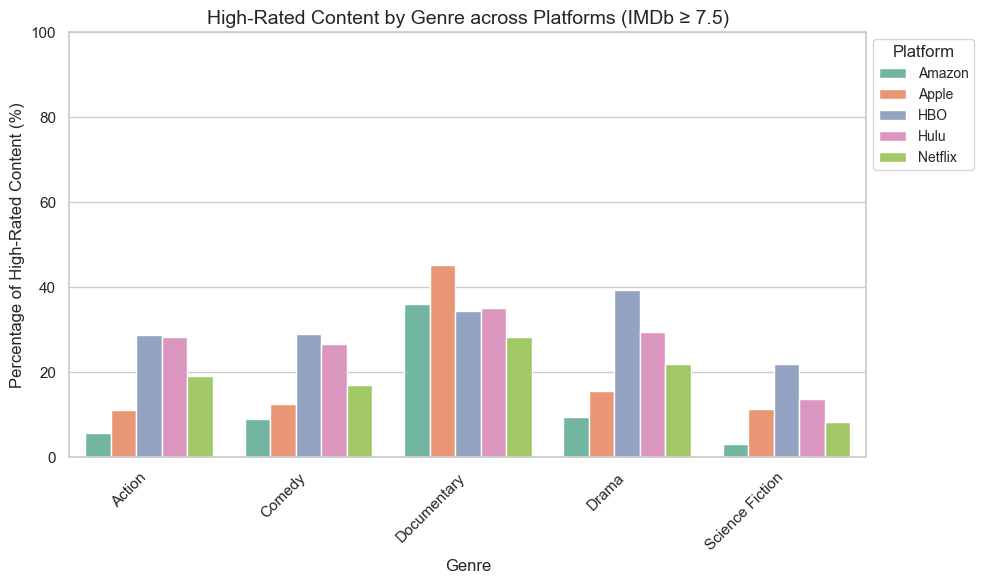


### **Analysis**

#### Decide on what genres to use as a subset
Based on top imdb titles 
Decision: Action, Comedy, Documentary, Drama, Science-Fiction

In [47]:
# Count high-rated items (7.5+) per genre for each platform
def high_rated_count_by_genre(df, genre_columns, threshold=7.5):
    """
    Calculate the count of high-rated titles by genre for each platform.

    Args:
        df (dict): A dictionary where keys are platform names and values are DataFrames containing title information.
        genre_columns (list): A list of genre column names to consider.
        threshold (float, optional): The rating threshold to consider a title as high-rated. Default is 7.5.

    Returns:
        dict: A dictionary where keys are platform names and values are dictionaries with genre counts of high-rated titles.
    """
    high_rated_counts = {}
    for platform, platform_df in df.items():
        genre_counts = {}
        for genre in genre_columns:
            high_rated_titles = platform_df[(platform_df[genre] == 1) & (platform_df['rating'] >= threshold)]
            genre_counts[genre] = len(high_rated_titles)
        high_rated_counts[platform] = genre_counts
    return high_rated_counts


In [48]:
# Extract the relevant columns from the imdb_top DataFrame
relevant_columns = imdb_top[['genres', 'numVotes', 'averageRating']]

# Remove leading/trailing whitespace and split genres by commas
imdb_top['genres'] = imdb_top['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')] if isinstance(x, str) else [])

# Flatten the genres into individual rows
genres_exploded = imdb_top.explode('genres')

# Group by genre and calculate the average rating and number of votes for each genre
genre_stats = genres_exploded.groupby('genres').agg(
    count=('genres', 'size'),
    avg_rating=('averageRating', 'mean'),
    avg_votes=('numVotes', 'mean')
).reset_index()

# Sort genres by count of titles and average rating
genre_stats_sorted = genre_stats.sort_values(by=['count', 'avg_rating'], ascending=False)

# Show top 15 genres by number of titles
genre_stats_sorted.head(15)


,genres,count,avg_rating,avg_votes
7,Drama,4228,7.680085,106990.305345
4,Comedy,1809,7.702653,97229.550028
5,Crime,1381,7.691962,114889.885590
0,Action,1179,7.712129,168626.330789
1,Adventure,947,7.721647,200946.434002
19,Romance,845,7.611243,84920.818935
24,Thriller,677,7.624520,150902.612999
16,Mystery,612,7.676797,129635.573529
2,Animation,574,7.847387,108676.719512
3,Biography,539,7.632839,109080.025974


In [49]:
# Print the top 15 genres by number of titles
genre_stats_sorted = genre_stats.sort_values(by=['count'], ascending=False)
print("Top 15 Genres by Number of Titles:")
print(genre_stats_sorted.head(15)[['genres', 'count']])

# Print the top 15 genres by average number of votes
genre_stats_sorted = genre_stats.sort_values(by=['avg_votes'], ascending=False)
print("\nTop 15 Genres by Number of Votes:")
print(genre_stats_sorted.head(15)[['genres', 'avg_votes']])

# Print the top 15 genres by average rating
genre_stats_sorted = genre_stats.sort_values(by=['avg_rating'], ascending=False)
print("\nTop 15 Genres by Average Rating:")
print(genre_stats_sorted.head(15)[['genres', 'avg_rating']])


Top 15 Genres by Number of Titles:
         genres  count
7         Drama   4228
4        Comedy   1809
5         Crime   1381
0        Action   1179
1     Adventure    947
19      Romance    845
24     Thriller    677
16      Mystery    612
2     Animation    574
3     Biography    539
9       Fantasy    346
12      History    340
6   Documentary    282
13       Horror    268
20       Sci-Fi    264

Top 15 Genres by Number of Votes:
       genres      avg_votes
20     Sci-Fi  307066.950758
1   Adventure  200946.434002
9     Fantasy  182404.924855
0      Action  168626.330789
24   Thriller  150902.612999
13     Horror  144256.555970
16    Mystery  129635.573529
5       Crime  114889.885590
8      Family  114520.697368
25        War  111294.403226
3   Biography  109080.025974
2   Animation  108676.719512
7       Drama  106990.305345
4      Comedy   97229.550028
26    Western   92338.321429

Top 15 Genres by Average Rating:
         genres  avg_rating
23    Talk-Show    8.218750
21      

#### High-Rated Content by Genre
Percentage of high-rated content (IMDb ≥ 7.5) in each genre across streaming platforms.

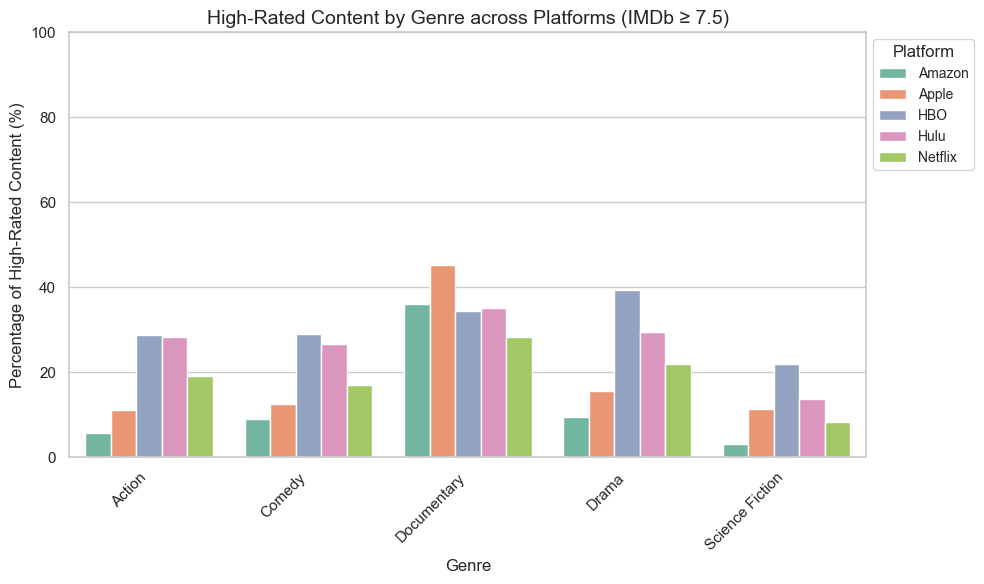

In [50]:
# Define function to calculate high-rated content by genre
def high_rated_by_genre(df):
    """
    Calculate the percentage of high-rated content (IMDb >= 7.5) by genre.

    Parameters:
    df (DataFrame): The DataFrame containing the content data.

    Returns:
    Series: A Series containing the percentage of high-rated content per genre.
    """
    # Filter for high-rated content (IMDb >= 7.5)
    high_rated_df = df[df['rating'] >= 7.5]
    
    # Count the number of high-rated content per genre (one-hot encoded)
    genre_counts = high_rated_df[['Action', 'Comedy', 'Documentary', 'Drama', 'Science Fiction']].sum()
    
    # Calculate total number of content per genre across all rows
    total_counts = df[['Action', 'Comedy', 'Documentary', 'Drama', 'Science Fiction']].sum()
    
    # Calculate percentage of high-rated content per genre
    percentage = (genre_counts / total_counts) * 100
    return percentage

# Dictionary to store high-rated content by genre for each platform
high_rated_genre_percentage = {}

# Loop through platforms
for platform, df in platforms.items():
    # Calculate the high-rated content percentage by genre
    high_rated_genre_percentage[platform] = high_rated_by_genre(df)

# Convert results to DataFrame for easier visualization
high_rated_genre_percentage_df = pd.DataFrame(high_rated_genre_percentage)

# Melt the data to long format for easier plotting with seaborn
melted_df = high_rated_genre_percentage_df.reset_index().melt(id_vars='index', var_name='Platform', value_name='High-Rated Content Percentage')
melted_df.columns = ['Genre', 'Platform', 'High-Rated Content Percentage']

# Set a Seaborn style and color palette with 5 colors
sns.set(style="whitegrid")
palette = sns.color_palette("Set2", n_colors=5)

# Plot the side-by-side bar chart with a cleaner layout
plt.figure(figsize=(10, 6))  # Adjusted figure size

# Creating the barplot
ax = sns.barplot(data=melted_df, x='Genre', y='High-Rated Content Percentage', hue='Platform', palette=palette)

# Title and labels
ax.set_title('High-Rated Content by Genre across Platforms (IMDb ≥ 7.5)', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Percentage of High-Rated Content (%)', fontsize=12)

# Adjusting the y-axis limit to focus on the relevant range (0-100%)
ax.set_ylim(0, 100)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjusting legend position and font size
plt.legend(title='Platform', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, markerscale=2)

# Adjust layout to make the plot more compact
plt.tight_layout()

# Save the plot to the specified path
output_path = "C:/Users/kimbe/Documents/StreamingAnalysis/outputs/high_rated_by_genre.png"
plt.savefig(output_path)

# Display the plot
plt.show()


In [51]:
high_rated_genre_percentage_df.T


,Action,Comedy,Documentary,Drama,Science Fiction
Amazon,5.618871,9.057399,35.974702,9.459863,3.180543
Apple,11.162433,12.513034,45.273264,15.678134,11.349693
HBO,28.762542,28.904847,34.392265,39.482565,21.951220
Hulu,28.351648,26.674938,35.024155,29.529530,13.829787
Netflix,19.227540,16.983471,28.209934,21.871953,8.333333



---

# Add all to comparison_data

In [52]:
# Ensure all lists and Series have the same index or length
platforms = ['Amazon', 'Apple', 'HBO', 'Hulu', 'Netflix']

# Convert lists to Series with the same index as exclusivity_percentage and average_rating
high_rated_percentages = pd.Series(high_rated_percentages, index=platforms)
cost_per_high_rated = pd.Series(cost_per_high_rated, index=platforms)
cancellation_rates = pd.Series(cancellation_rates, index=platforms)

# Initialize comparison dataframe with the necessary data
comparison_data = pd.DataFrame({
    'High-Rated Content (%)': high_rated_percentages,
    'Exclusivity (%)': exclusivity_percentage,
    'Average Rating (Exclusive Titles)': average_rating,
    'Cost-Effectiveness (per Title)': cost_per_high_rated,
    'Cancellation Rate (%)': cancellation_rates,
    'Genre-Specific Analysis': [
        'Niche: Documentary (Top 2)',
        'Niche: Documentary (Top 1)',
        'Niche: Action, Comedy, Drama, Science Fiction (Top 1)',
        'Niche: Action, Comedy, Drama (Top 2)',
        'Niche: Action, Comedy, Drama, Science Fiction (Top 3)'
    ]
}, index=platforms)

# Convert comparison_data to comparison_df and round numeric columns
comparison_df = comparison_data.round({
    'High-Rated Content (%)': 2,
    'Exclusivity (%)': 2,
    'Average Rating (Exclusive Titles)': 2,
    'Cost-Effectiveness (per Title)': 4,
    'Cancellation Rate (%)': 2
})

# Define the output path
output_path = r"C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_df.csv"

# Save the dataframe to the specified path
comparison_df.to_csv(output_path, index=True)


# Final Comparison dataframe 

In [53]:
# Display the comparison DataFrame
comparison_df


,High-Rated Content (%),Exclusivity (%),Average Rating (Exclusive Titles),Cost-Effectiveness (per Title),Cancellation Rate (%),Genre-Specific Analysis
Amazon,11.24,93.29,5.79,0.0059,9.0,Niche: Documentary (Top 2)
Apple,16.92,76.68,6.59,0.0055,4.9,Niche: Documentary (Top 1)
HBO,32.16,94.16,6.47,0.0218,26.9,"Niche: Action, Comedy, Drama, Science Fiction ..."
Hulu,26.56,85.56,6.31,0.0238,15.2,"Niche: Action, Comedy, Drama (Top 2)"
Netflix,19.61,92.43,6.92,0.0115,10.2,"Niche: Action, Comedy, Drama, Science Fiction ..."
